In [1]:
import numpy as np
from umap import UMAP
import hdbscan
import matplotlib.pyplot as plt

# ========== LOAD DATA ==========
# Load multi-scale k-mer frequency data (8,362 features per sequence)
# Features: length + 7-mers + 4-mers + 3-mers + GC content
X_freq = np.load('./Data/all_multimer_frequencies_l5000_shuffled.npy')[:100_000]

print(f'Loaded {X_freq.shape[0]} sequences with {X_freq.shape[1]} features')

/home/torben/Clustering/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-11-25 18:05:18.088626: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-25 18:05:18.124298: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loaded 100000 sequences with 8362 features


In [2]:
# ========== UMAP DIMENSIONALITY REDUCTION ==========
# First reduce to 32 dimensions for clustering
reducer_32d = UMAP(
    n_components = 32,
    metric = 'cosine',
    n_neighbors = 15,
    min_dist = 0.0,
    verbose = True,
    random_state = 42
)

embedding_32d = reducer_32d.fit_transform(X_freq)
print(f'32D embedding shape: {embedding_32d.shape}')

/home/torben/Clustering/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.0, n_components=32, n_jobs=1, random_state=42, verbose=True)
Tue Nov 25 18:06:43 2025 Construct fuzzy simplicial set
Tue Nov 25 18:06:43 2025 Finding Nearest Neighbors
Tue Nov 25 18:06:43 2025 Building RP forest with 21 trees
Tue Nov 25 18:07:19 2025 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	 5  /  17
	 6  /  17
	Stopping threshold met -- exiting after 6 iterations
Tue Nov 25 18:08:01 2025 Finished Nearest Neighbor Search
Tue Nov 25 18:08:03 2025 Construct embedding


Epochs completed:   1%|            2/200 [00:00]

	completed  0  /  200 epochs


Epochs completed:  11%| █          22/200 [00:11]

	completed  20  /  200 epochs


Epochs completed:  20%| ██         41/200 [00:21]

	completed  40  /  200 epochs


Epochs completed:  31%| ███        62/200 [00:32]

	completed  60  /  200 epochs


Epochs completed:  41%| ████       82/200 [00:43]

	completed  80  /  200 epochs


Epochs completed:  50%| █████      101/200 [00:53]

	completed  100  /  200 epochs


Epochs completed:  61%| ██████     122/200 [01:04]

	completed  120  /  200 epochs


Epochs completed:  70%| ███████    141/200 [01:14]

	completed  140  /  200 epochs


Epochs completed:  81%| ████████   162/200 [01:25]

	completed  160  /  200 epochs


Epochs completed:  91%| █████████  182/200 [01:36]

	completed  180  /  200 epochs


Epochs completed: 100%| ██████████ 200/200 [01:46]


Tue Nov 25 18:10:01 2025 Finished embedding
32D embedding shape: (100000, 32)


In [12]:
# ========== HDBSCAN CLUSTERING ==========
clusterer = hdbscan.HDBSCAN(
    min_cluster_size = 50,
    min_samples = 5,
    metric = 'euclidean'
)
labels = clusterer.fit_predict(embedding_32d)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = (labels == -1).sum()

print(f'Found {n_clusters} clusters')
print(f'Noise points: {n_noise} ({100 * n_noise / len(labels):.1f}%)')

/home/torben/Clustering/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/torben/Clustering/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 8 clusters
Noise points: 73005 (73.0%)


In [13]:
# ========== 2D UMAP FOR VISUALIZATION ==========
reducer_2d = UMAP(
    n_components = 2,
    metric = 'cosine',
    n_neighbors = 15,
    min_dist = 0.0,
    verbose = True,
    random_state = 42
)
embedding_2d = reducer_2d.fit_transform(X_freq)
print(f'2D embedding shape: {embedding_2d.shape}')

/home/torben/Clustering/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.0, n_jobs=1, random_state=42, verbose=True)
Tue Nov 25 18:52:00 2025 Construct fuzzy simplicial set
Tue Nov 25 18:52:00 2025 Finding Nearest Neighbors
Tue Nov 25 18:52:00 2025 Building RP forest with 21 trees
Tue Nov 25 18:52:31 2025 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	 5  /  17
	 6  /  17
	Stopping threshold met -- exiting after 6 iterations
Tue Nov 25 18:53:07 2025 Finished Nearest Neighbor Search
Tue Nov 25 18:53:08 2025 Construct embedding


Epochs completed:   2%| ▏          3/200 [00:00]

	completed  0  /  200 epochs


Epochs completed:  11%| █          22/200 [00:07]

	completed  20  /  200 epochs


Epochs completed:  20%| ██         41/200 [00:15]

	completed  40  /  200 epochs


Epochs completed:  31%| ███        62/200 [00:23]

	completed  60  /  200 epochs


Epochs completed:  41%| ████       82/200 [00:30]

	completed  80  /  200 epochs


Epochs completed:  51%| █████      102/200 [00:38]

	completed  100  /  200 epochs


Epochs completed:  61%| ██████     122/200 [00:45]

	completed  120  /  200 epochs


Epochs completed:  71%| ███████    142/200 [00:53]

	completed  140  /  200 epochs


Epochs completed:  81%| ████████   162/200 [01:00]

	completed  160  /  200 epochs


Epochs completed:  91%| █████████  182/200 [01:08]

	completed  180  /  200 epochs


Epochs completed: 100%| ██████████ 200/200 [01:15]


Tue Nov 25 18:54:28 2025 Finished embedding
2D embedding shape: (100000, 2)


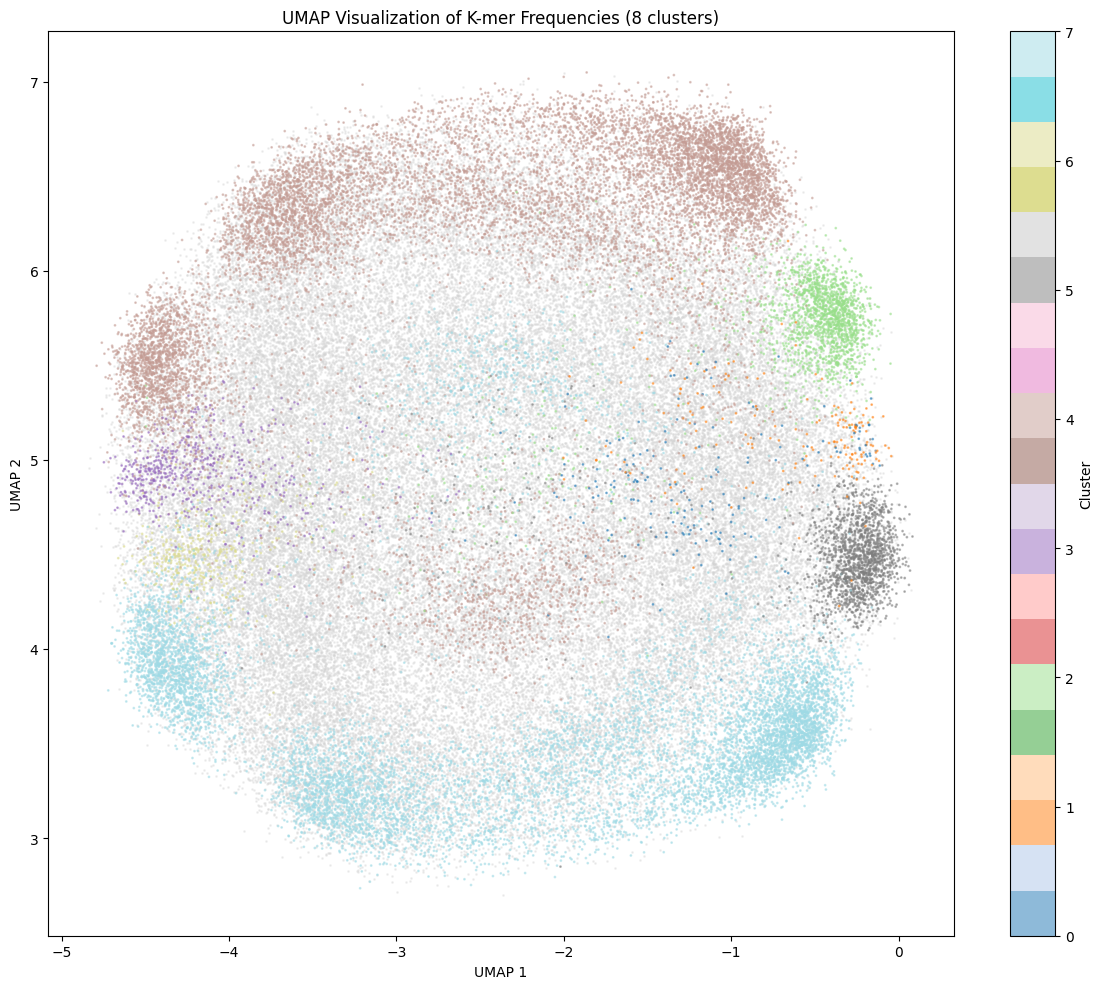

In [14]:
# ========== VISUALIZATION ==========
fig, ax = plt.subplots(figsize = (12, 10))

# Plot noise points in gray
noise_mask = labels == -1
ax.scatter(
    embedding_2d[noise_mask, 0],
    embedding_2d[noise_mask, 1],
    c = 'lightgray',
    s = 1,
    alpha = 0.3,
    label = 'Noise'
)

# Plot clustered points
scatter = ax.scatter(
    embedding_2d[~noise_mask, 0],
    embedding_2d[~noise_mask, 1],
    c = labels[~noise_mask],
    cmap = 'tab20',
    s = 1,
    alpha = 0.5
)

ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_title(f'UMAP Visualization of K-mer Frequencies ({n_clusters} clusters)')
plt.colorbar(scatter, ax = ax, label = 'Cluster')
plt.tight_layout()
plt.show()